In [3]:
import numpy as np
import matplotlib.pyplot as plt
from noteify.core.datasets import (MusicNetDataset, MusicNetDatasetProcessed, MusicAugmentor,
                                   MusicNetSampler, get_musicnet_dataloader)
from noteify.core.utils import plot_audio, plot_roll_info

In [4]:
data_dir = r"D:\Users\Shahir\Documents\Code Repositories\music-transcription\musicnet"
raw_dataset = MusicNetDataset(data_dir, download=True)

Record ID: 1727
Sampling rate: 44100
Number of samples: 19715328
Note info: [{'start_time': 33758, 'end_time': 62430, 'instrument': 42, 'note': 60, 'start_beat': 4.5, 'end_beat': 0.5, 'note_value': 'Eighth'}, {'start_time': 9182, 'end_time': 202206, 'instrument': 44, 'note': 41, 'start_beat': 4.0, 'end_beat': 3.5, 'note_value': 'Whole'}, {'start_time': 9182, 'end_time': 62430, 'instrument': 1, 'note': 69, 'start_beat': 4.0, 'end_beat': 1.0, 'note_value': 'Quarter'}, {'start_time': 9182, 'end_time': 33758, 'instrument': 42, 'note': 65, 'start_beat': 4.0, 'end_beat': 0.5, 'note_value': 'Eighth'}, {'start_time': 9182, 'end_time': 62430, 'instrument': 1, 'note': 81, 'start_beat': 4.0, 'end_beat': 1.0, 'note_value': 'Quarter'}, {'start_time': 9182, 'end_time': 90078, 'instrument': 43, 'note': 53, 'start_beat': 4.0, 'end_beat': 1.5, 'note_value': 'Dotted Quarter'}]


C:\Users\Shahir\Documents\Code Repositories\music-transcription\noteify\core\utils.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


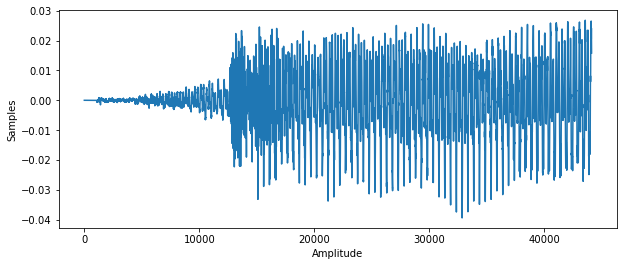

In [5]:
rec_id = raw_dataset.rec_ids[0]
num_samples = raw_dataset.get_record_length(rec_id)
sr = raw_dataset.SAMPLE_RATE
x, note_info = raw_dataset.get_record_data(rec_id, 0, sr*1)
print("Record ID:", rec_id)
print("Sampling rate:", sr)
print("Number of samples:", num_samples)
print("Note info:", note_info)
plot_audio(x)

C:\Users\Shahir\Documents\Code Repositories\music-transcription\noteify\core\utils.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Shahir\Documents\Code Repositories\music-transcription\noteify\core\utils.py:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


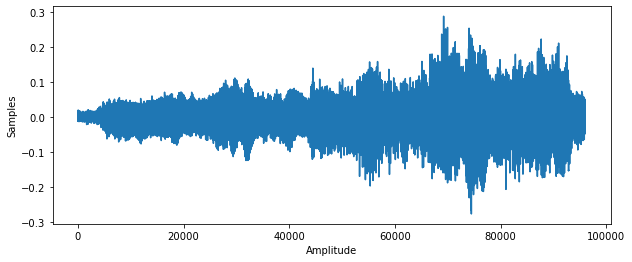

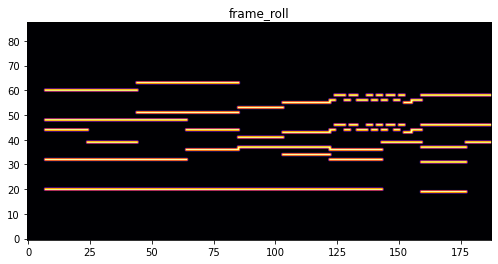

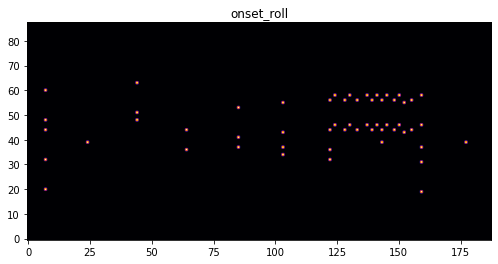

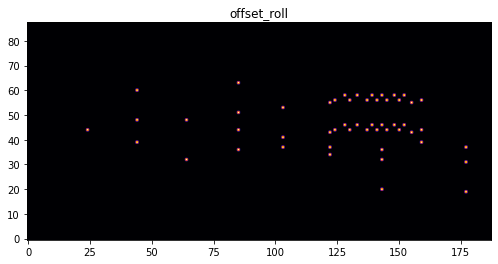

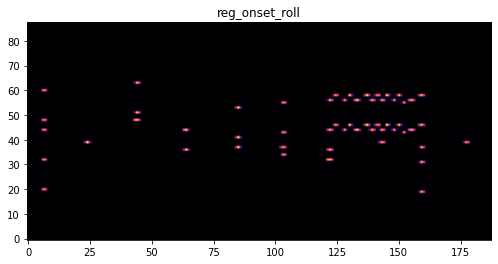

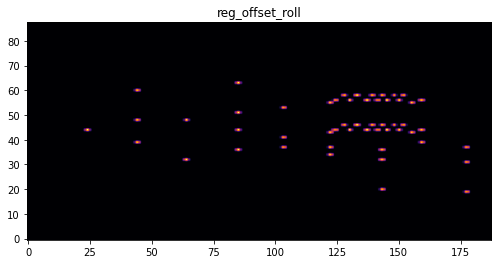

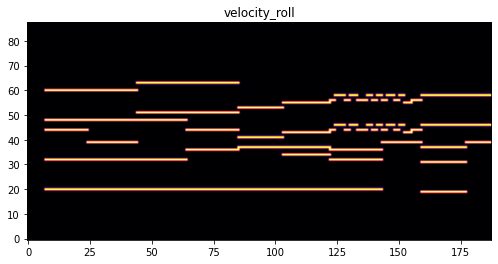

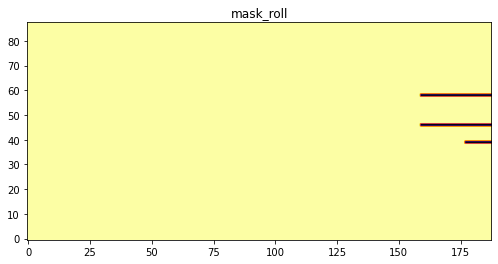

In [6]:
proc_dataset = MusicNetDatasetProcessed(raw_dataset, MusicAugmentor())
x, roll_info = proc_dataset[rec_id, 0]
plot_audio(x)
plot_roll_info(roll_info)

In [7]:
batch_size = 2
sampler = MusicNetSampler(proc_dataset, batch_size)
dataloader = get_musicnet_dataloader(proc_dataset, sampler, num_workers=None)

In [8]:
batch = next(iter(dataloader))
print({k: v.shape for k, v in batch.items()})

{'waveform': torch.Size([2, 96000]), 'frame_roll': torch.Size([2, 188, 88]), 'onset_roll': torch.Size([2, 188, 88]), 'offset_roll': torch.Size([2, 188, 88]), 'reg_onset_roll': torch.Size([2, 188, 88]), 'reg_offset_roll': torch.Size([2, 188, 88]), 'velocity_roll': torch.Size([2, 188, 88]), 'mask_roll': torch.Size([2, 188, 88])}
